Astronomical data analysis using Python
=======

Lecture 10
-----------------



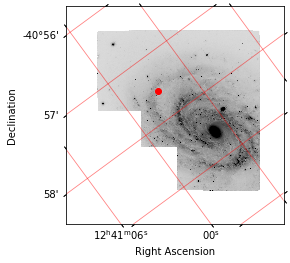

In [37]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from astropy.visualization import ZScaleInterval
from astropy.coordinates import SkyCoord
hdulist = fits.open('h_n4603_f555_mosaic.fits')
wcs = WCS(hdulist[0].header)
interval = ZScaleInterval()
vmin,vmax = interval.get_limits(hdulist[0].data)
ax = plt.subplot(111, projection=wcs)
ax.imshow(hdulist[0].data, cmap='gray_r', vmin=vmin, vmax=vmax, interpolation=None, origin='lower')
ax.set_xlabel("Right Ascension"); ax.set_ylabel("Declination")
ax.coords.grid(color='red', alpha=0.5, linestyle='solid')
ax.plot_coord(SkyCoord("12h40m57s","-40d57m33s", frame="fk5"), "ro")
hdulist.close()


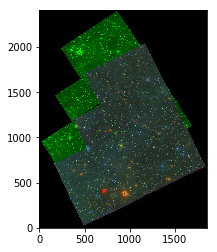

In [38]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb # see Lupton et al. (2004)
# These images are available at https://archive.stsci.edu/prepds/appp/lmc.html
image_r = fits.getdata('h_pu4k2bs01_f814w_sci_v20.fits')/2
image_g = fits.getdata('h_pu4k2bs01_f606w_sci_v20.fits')/3
image_b = fits.getdata('h_pu4k2bs01_f450w_sci_v20.fits')
image = make_lupton_rgb(image_r, image_g, image_b, stretch = 0.03, Q=10, filename='lmc.jpg')
plt.imshow(image,origin='lower')

# The composite RGB image

<IMG SRC="lmc.jpg" width=450px>

# astropy.stats

The `astropy.stats` package holds statistical functions or algorithms used in astronomy. While the `scipy.stats` and `statsmodels` packages contains a wide range of statistical tools, they are general-purpose packages and are missing **some tools that are particularly useful or specific to astronomy** . This package provides this missing functionality, but will not replace scipy.stats if its implementation.

You will find, in practice, that `scipy.stats` which is a huge package, contains almost everything you will need. `astropy.stats` adds a few missing pieces. We will discuss two topics from `astropy.stats` - sigma clipping and jackknife errors - which I have found useful. 



# Sigma Clipping

In [39]:
from astropy import stats
import numpy as np
data = np.array([1, 5, 6, 8, 100, 150, 3, 2])
clipped_data = stats.sigma_clip(data, sigma=2, maxiters=5)
print (clipped_data)
print (data.mean())
print (clipped_data.mean())

[1 5 6 8 -- -- 3 2]
34.375
4.166666666666667


# The jackknife statistic

In [40]:
from astropy.stats import jackknife_stats
data = np.array([1,2,3,4,5,6,7,8,9,0]) 
test_statistic = np.mean
estimate, bias, stderr, conf_interval = jackknife_stats(data, test_statistic, 0.95)
print (estimate)
print (bias)
print (stderr)  
print (conf_interval)

4.5
0.0
0.9574271077563383
[2.62347735 6.37652265]


Cosmology
=========

This submodule of astropy allows you to do various cosmological calculations based on a model of cosmology.

We begin by importing the cosmology sub-module.

In [41]:
from astropy import cosmology

Now, before we can make do any cosmological calculations, we need to choose a model. Let's do that.

In [42]:
print (cosmology.parameters.available)

['Planck15', 'Planck13', 'WMAP9', 'WMAP7', 'WMAP5']


The above are the various models of cosmology available, you can choose one of them by saying, 

In [43]:
from astropy.cosmology import WMAP9

Or you could define your own cosmology by saying,

    from astropy.comsology import FlatLambdaCDM
    mycosmo = FlatLambdaCDM(..., ...., ....) 
    
Refer documentation for more details. From Astropy 5.0 onwards, you can read or write a cosmology from a file.

Performing Cosmological Calculations
-----------------

In [44]:
WMAP9.Ode(3)  # density parameter for dark energy at redshift z=3   (in units of critical density)

0.03740695999290828

In [45]:
WMAP9.critical_density(3)   # critical density at z=3

<Quantity 1.72145095e-28 g / cm3>

In [46]:
WMAP9.Tcmb(1100)    # CMB temperature at z=1100

<Quantity 3000.225 K>

In [47]:
WMAP9.angular_diameter_distance(2)  # Angular diameter distance in Mpc at z=2.

<Quantity 1763.91013527 Mpc>

In [48]:
WMAP9.arcsec_per_kpc_comoving(3)  # Angular separation in arcsec corresponding to a comoving kpc at z=3

<Quantity 0.03171401 arcsec / kpc>

In [49]:
WMAP9.scale_factor(4)     # a = 1/(1+z)

0.2

In [50]:
WMAP9.age(1100)       # Age of universe at z=1100

<Quantity 0.00037004 Gyr>

In [51]:
print (dir(WMAP9))

['H', 'H0', 'Neff', 'Ob', 'Ob0', 'Ode', 'Ode0', 'Odm', 'Odm0', 'Ogamma', 'Ogamma0', 'Ok', 'Ok0', 'Om', 'Om0', 'Onu', 'Onu0', 'Tcmb', 'Tcmb0', 'Tnu', 'Tnu0', '_EdS_age', '_EdS_comoving_distance_z1z2', '_EdS_lookback_time', '_H0', '_Neff', '_Ob0', '_Ode0', '_Odm0', '_Ogamma0', '_Ok0', '_Om0', '_Onu0', '_T_hypergeometric', '_Tcmb0', '_Tnu0', '__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_cache', '_abc_negative_cache', '_abc_negative_cache_version', '_abc_registry', '_abs_distance_integrand_scalar', '_age', '_comoving_distance_z1z2', '_comoving_transverse_distance_z1z2', '_critical_density0', '_dS_age', '_dS_comoving_distance_z1z2', '_dS_lookback_time', '_elliptic_comov

# astropy.modeling

astropy.modeling is a module in Python designed to give you

* Access to commonly used models.
* As well as fit them to various data.


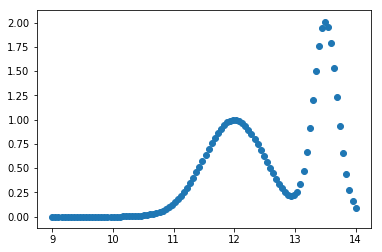

In [52]:
from astropy.modeling import models
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(9, 14, 100)
gauss_example1 = models.Gaussian1D(amplitude=1.0, mean=12, stddev=0.5)
gauss_example2 = models.Gaussian1D(amplitude=2.0, mean=13.5, stddev=0.2)
gauss_total = gauss_example1 + gauss_example2
y = gauss_total(x)

plt.scatter(x,y)

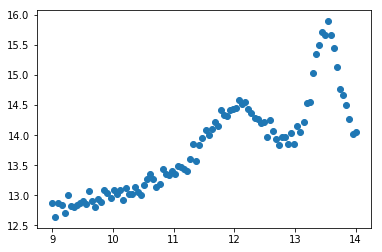

In [53]:
import numpy.random as nr

y_noise = nr.normal(0, 0.1, len(x))
y_obs = 12 + 0.01*x**2 + y + y_noise
plt.scatter(x, y_obs)

We saw how trivial it is to use a model and actually evaluate it over a range. But a more useful thing we need to do with models is to fit some data. Now, pretend that x and y_obs are two arrays that contain our observed data as in the plot above.

Once we have a plot, our next step is to choose a model. How do we choose a model? Let us assume that these are spectral features with some known wavelengths. Each feature can be assumed to be a Gaussian. To minimise the number of independent parameters, we may also consider that the difference in the wavelengths is a constant. 

Next, these emission features are sitting atop a continuum. Assuming that the continuum is not varying at a fast rate wrt wavelength, we can further assume that a quadratic polynomial suffices in accounting for this variation.

So, our model could be a second order polynomial plus two Gaussians, with different means but separated by a fixed wavelength. *There are subjective decisions we have made here informed by our knowledge of the physical situation.*


In [54]:
# So, let us define our model.
model = models.Gaussian1D(amplitude=1.0, mean=12.1, stddev=0.5) +\
        models.Gaussian1D(amplitude=1.0, mean=13.6, stddev=0.4) +\
        models.Polynomial1D(degree=2)

print(model.param_names)

('amplitude_0', 'mean_0', 'stddev_0', 'amplitude_1', 'mean_1', 'stddev_1', 'c0_2', 'c1_2', 'c2_2')


In [55]:
# Our model is not complete. We must supply our constraint.
def constraint_mean(model):
    mean_0 = model.mean_1 - 1.5
    return mean_0

model.mean_0.tied = constraint_mean

The model is now ready. We have the (simulated)  data. What we now need is a fitting algorithm. Let us choose the Levenberg-Marquardt algorithm. For linear fits, use LinearLSQFitter()

In [56]:
from astropy.modeling import fitting
fitter = fitting.LevMarLSQFitter()

model_fit = fitter(model, x, y_obs)
print (model_fit.param_names)
print(model_fit.parameters)

('amplitude_0', 'mean_0', 'stddev_0', 'amplitude_1', 'mean_1', 'stddev_1', 'c0_2', 'c1_2', 'c2_2')
[ 9.63913742e-01  1.20049641e+01  4.70960786e-01  1.96093180e+00
  1.35049641e+01  2.09833282e-01  9.76167533e+00  3.96892758e-01
 -7.06811577e-03]


In [57]:
dict(zip(model_fit.param_names, model_fit.parameters))

{'amplitude_0': 0.9639137418357056,
 'mean_0': 12.004964143019267,
 'stddev_0': 0.47096078575220635,
 'amplitude_1': 1.9609317989613408,
 'mean_1': 13.504964143019267,
 'stddev_1': 0.20983328151513872,
 'c0_2': 9.761675330109876,
 'c1_2': 0.396892757516537,
 'c2_2': -0.007068115768680666}

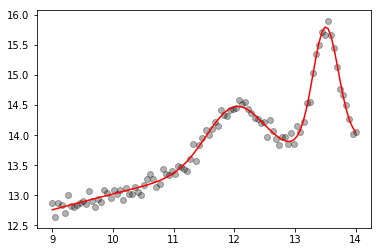

In [58]:
plt.scatter(x, y_obs, color='black', alpha=0.3)
plt.plot(x, model_fit(x), color='red')

# `astropy.convolution`

`astropy.convolution` provides convolution functions and kernels that offer improvements compared to the SciPy `scipy.ndimage` convolution routines, including:

* Proper treatment of `NaN` values (ignoring them during convolution and replacing NaN pixels with interpolated values)
* A single function for 1D, 2D, and 3D convolution
* Improved options for the treatment of edges
* Both direct and Fast Fourier Transform (FFT) versions
* Built-in kernels that are commonly used in Astronomy

I have tried to cover the most frequently used aspects of `astropy`. But to learn more do check out the excellent tutorials and documentation of astropy available at:

http://www.astropy.org

Astropy is still undergoing rapid development and new features are being added continuously. The coordinated packages are also in a state of flux. An excellent resourse is the astropy mailing list:


https://mail.python.org/pipermail/astropy/

Do join this list to get answers to any issues you face with astropy and its affiliated packages.


# Astroquery

You may have accessed data in some online archives, one search at a time. This may be too slow if your sample contains thousands of objects. In such a situation, you must write a program to automatically access the data that you are interested in.Astroquery is the Python language package that will provide you with this capability and it is very easy to code. It contains a number of subpackages for each data repository.


There are two other packages with complimentary functionality as Astroquery: pyvo is an Astropy affiliated package, and Simple-Cone-Search-Creator which generates a cone search service complying with the IVOA standard. They are more oriented to general virtual observatory discovery and queries, whereas Astroquery has web service specific interfaces.

Astroquery follows a **continuous deployment model**.


In [59]:
import astroquery
print (astroquery.version.version)

0.3.9.dev0


**Use the latest astroquery version available**. Website configurations change constantly and your programs could stop working suddenly because the website changed its interface.

To help you get started, see the sample queries in the astroquery gallery.

https://astroquery.readthedocs.io/en/latest/gallery.html


In [60]:
from astroquery.simbad import Simbad
from astropy import coordinates
import astropy.units as u
# works only for ICRS coordinates:
c = coordinates.SkyCoord("05h35m17.3s -05d23m28s", frame='icrs')
r = 1 * u.arcminute
result_table = Simbad.query_region(c, radius=r)
result_table.pprint(show_unit=True, max_width=100, max_lines=10)

      MAIN_ID            RA          DEC      ...     COO_BIBCODE     SCRIPT_NUMBER_ID
                      "h:m:s"      "d:m:s"    ...                                     
------------------- ------------ ------------ ... ------------------- ----------------
              M  42   05 35 17.3    -05 23 28 ... 1981MNRAS.194..693L                1
    NAME Ori Region  05 35 17.30  -05 23 28.0 ...                                    1
                ...          ...          ... ...                 ...              ...
     [OW94] 134-342   05 35 13.4    -05 23 42 ... 2003AJ....125..277O                1
        [SCB99] 181 05 35 17.608 -05 22 28.24 ... 1999AJ....117.1375S                1
MMB G208.996-19.386  05 35 14.50  -05 22 45.0 ... 2010MNRAS.404.1029C                1
Length = 704 rows


# Cross match with any Vizier catalog

In [61]:
!cat pos_list.csv

ra,dec
267.22029,-20.35869
274.83971,-25.42714
275.92229,-30.36572
283.26621,-8.70756
306.01575,33.86756
322.493,12.16703



In [62]:
from astropy import units as u
from astroquery.xmatch import XMatch
table = XMatch.query(cat1=open('pos_list.csv'),
                     cat2='vizier:II/246/out', # 2MASS catalog
                     max_distance=5 * u.arcsec, colRA1='ra',
                     colDec1='dec')
print (type(table))
print (table.colnames)

<class 'astropy.table.table.Table'>
['angDist', 'ra', 'dec', '2MASS', 'RAJ2000', 'DEJ2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'Jmag', 'Hmag', 'Kmag', 'e_Jmag', 'e_Hmag', 'e_Kmag', 'Qfl', 'Rfl', 'X', 'MeasureJD']


In [63]:
print (table)

angDist      ra       dec         2MASS       ... Qfl Rfl  X   MeasureJD  
-------- --------- --------- ---------------- ... --- --- --- ------------
1.352044 267.22029 -20.35869 17485281-2021323 ... EEU 226   2 2450950.8609
1.578188 267.22029 -20.35869 17485288-2021328 ... UUB 662   2 2450950.8609
3.699368 267.22029 -20.35869 17485264-2021294 ... UUB 662   2 2450950.8609
3.822922 267.22029 -20.35869 17485299-2021279 ... EBA 222   2 2450950.8609
4.576677 267.22029 -20.35869 17485255-2021326 ... CEU 226   2 2450950.8609
0.219609 274.83971 -25.42714 18192154-2525377 ... AAA 211   0 2451407.5033
1.633225 275.92229 -30.36572 18234133-3021582 ... EEE 222   2 2451021.7212
0.536998 283.26621  -8.70756 18530390-0842276 ... AAA 222   0 2451301.7945
1.178542 306.01575  33.86756 20240382+3352021 ... AAA 222   0 2450948.9708
0.853178   322.493  12.16703 21295836+1210007 ... EEA 222   0 2451080.6935
 4.50395   322.493  12.16703 21295861+1210023 ... EEE 222   0 2451080.6935


# Getting data from the SDSS

In [64]:
from astroquery.sdss import SDSS
from astropy import coordinates as coords
pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
xid = SDSS.query_region(pos, spectro=True)
print(xid)

       ra              dec               objid        ... run2d instrument
---------------- ---------------- ------------------- ... ----- ----------
2.02344596303101 14.8398237521302 1237652943176138868 ...    26       SDSS


/home/yogesh/.local/lib/python3.6/site-packages/astroquery/sdss/core.py:856: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [65]:
sp = SDSS.get_spectra(matches=xid)
print (sp)
spec = sp[0][1].data

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f2b53cf4160>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2b533cfb70>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2b53ca6a20>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2b53fe8320>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2a2c19ffd0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2a80138630>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2a80179160>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2b53409908>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2b53424358>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2b53436d68>]]


(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')])


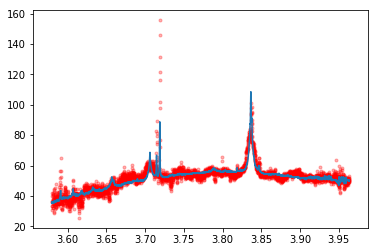

In [66]:
import matplotlib.pyplot as plt
print (spec.dtype)
flux = spec['flux']
loglam = spec['loglam']
model = spec['model']
plt.scatter(loglam,flux,marker='.',alpha=0.3,color='red')
plt.plot(loglam,model)

In [67]:
import numpy as np
im = SDSS.get_images(matches=xid,band='r')
print (im)
image = im[0][0].data
print (image.shape)



[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f2a800f12b0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x7f2a2f592780>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2b529bde80>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f2b529676a0>]]
(1489, 2048)


# Display the downloaded image

/home/yogesh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


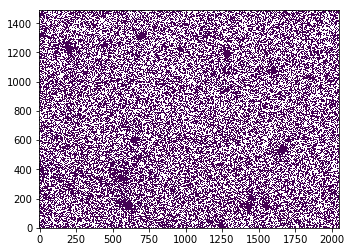

In [69]:
plt.imshow(np.sqrt(image),origin='lower',vmin=10)

# Be careful

Astroquery can easily run amok and download a lot of data that you don't need. So, be a little cautious at the download steps and make sure that you are downloading what you expect. Setting up `assert` statements before you start the download will be very useful.